In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(w, X, y):
    if y.ndim == 1:
        y = y.reshape(-1, 1)
    m = len(y)
    z = X @ w
    predictions = sigmoid(z)

    # Защита от log(0)
    epsilon = 1e-15
    loss = -np.mean(y * np.log(predictions + epsilon) + (1-y) * np.log(1 - predictions + epsilon))

    # Градиент
    grad = (1/m) * (X.T @ (predictions - y))

    return loss, grad

In [35]:
# Пороговая (не используется в обучении, только визуализация)
def threshold_loss(z):
    return np.where(z > 0, 0, 1)

# Экспоненциальная
def exponential_loss(z):
    return np.exp(-z)

# Квадратичная
def squared_loss(z):
    return (1 - sigmoid(z))**2

# Логистическая (для сравнения с log_loss)
def logistic_loss(z):
    return np.log(1 + np.exp(-z))

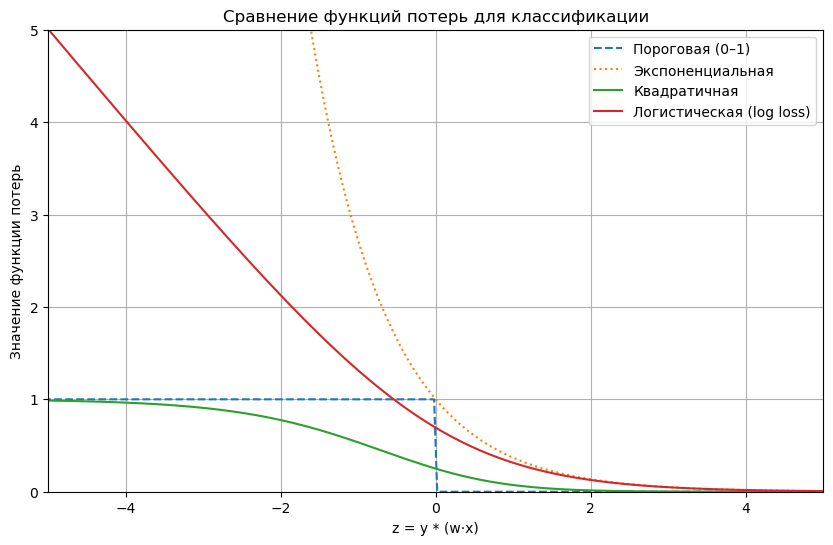

In [36]:
# Диапазон значений: отступ z = y * (w⋅x)
z = np.linspace(-10, 10, 500)

# Вычисляем значения потерь
threshold = threshold_loss(z)
exp_ = exponential_loss(z)
square = squared_loss(z)
logistic = logistic_loss(z)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(z, threshold, label="Пороговая (0–1)", linestyle='--')
plt.plot(z, exp_, label="Экспоненциальная", linestyle=':')
plt.plot(z, square, label="Квадратичная")
plt.plot(z, logistic, label="Логистическая (log loss)")

plt.title("Сравнение функций потерь для классификации")
plt.xlabel("z = y * (w⋅x)")
plt.ylabel("Значение функции потерь")
plt.legend()
plt.grid(True)
plt.ylim(0, 5)
plt.xlim(-5, 5)
plt.show()

In [37]:

def optimize(w, X, y, n_iterations, eta):

    losses = []

    for i in range(n_iterations):
        loss, grad = log_loss(w, X, y)
        w -= eta * grad 
        losses.append(loss)

    return w, losses

In [38]:

def predict(w, X, b=0.5):
    y_pred = []
    for i in range(len(X)):
        z = np.dot(X[i], w)
        prob = sigmoid(z)
        y_pred.append(1 if prob >= b else 0)

    return np.array(y_pred)

In [ ]:
# def predict(w, X, b=0.5):
#     probs = sigmoid(X @ w)
#     y_predicted = (probabilities >= b).astype(int)
#     return (probs >= b).astype(int) - эта версия в 10 раз быстрее

# Запуск функции

In [40]:
# Данные
np.random.seed(42)
X = np.random.randn(200, 2)
w_true = np.array([2.0, -1.0])
y = (sigmoid(X @ w_true) > 0.5).astype(int)

# Приведение y к столбцу
y = y.reshape(-1, 1)

# Добавим смещение
X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

# Инициализация весов
w_init = np.zeros((X_bias.shape[1], 1))  # (3, 1)

# Обучение
w_final, losses = optimize(w_init, X_bias, y, n_iterations=1000, eta=0.1)

# Предсказания
y_pred = predict(w_final, X_bias)

# Точность
accuracy = np.mean(y_pred.ravel() == y.ravel())
print(f"Точность: {accuracy:.4f}")

Точность: 0.9950


# График функции

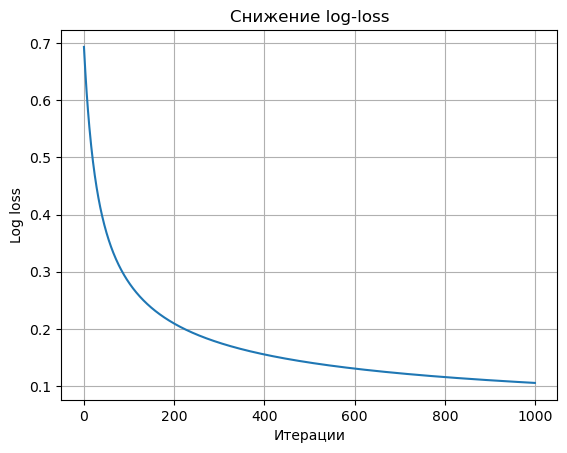

In [41]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title("Снижение log-loss")
plt.xlabel("Итерации")
plt.ylabel("Log loss")
plt.grid(True)
plt.show()

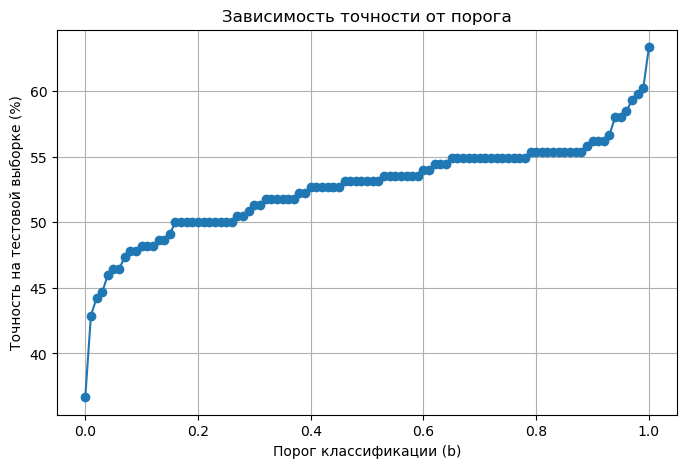

In [42]:
# Разделение на train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bias, y, test_size=0.3, random_state=0)

# Инициализация весов и обучение 
w0 = np.zeros((X_train.shape[1], 1))
w_trained, _ = optimize(w0, X_train, y_train, n_iterations=1000, eta=0.1)

# График зависимости точности от порога 
thresholds = []
accuracies = []

for b in range(0, 101):
    threshold = b / 100
    y_pred = predict(w_trained, X_test, b=threshold)
    accuracy = np.mean(y_pred.ravel() == y_test) * 100

    thresholds.append(threshold)
    accuracies.append(accuracy)

# Построение графика 
plt.figure(figsize=(8, 5))
plt.plot(thresholds, accuracies, marker='o')
plt.xlabel("Порог классификации (b)")
plt.ylabel("Точность на тестовой выборке (%)")
plt.title("Зависимость точности от порога")
plt.grid(True)
plt.show()

# *Как влияет размер шага (eta) на сходимость алгоритма?*

- Это параметр, который отвечает за обновление весов, наколько сильно они будут меняться с каждым шагом. Если эта слишком маленькая, то нужно очень ммног итераций до момента, когда алгоритм сойдётся.

- Если эта слишком больщая, то алгоритм может перескачить минимум, не сойтись и модель не обучится. Также, веса могут стать огромными по модулю, из-за чего модель становится нестабильной (близкая к 0 или 1 => Nan или inf)

# *Что произойдет, если выбрать слишком маленькое или слишком большое количество итераций (n_iterations)?*

- Если мало итераций, то алгоритм может не приблизиться к минимуму, модель будет недообучена и давать низкую точность.

- Если слишком много итераций, возможно переобучение.

# *Почему логистическая регрессия подходит для задач только бинарной классификации?*

- Она для вычисления вероятности.

- Она использует одну сигмоиду и даёт результат в диапазоне [0, 1] - вероятность класса.